In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [62]:
df = pd.read_csv('../data/delaney-mordred.csv')

In [63]:
df

,name,smiles,logS,mordred_0,mordred_1,mordred_2,mordred_3,mordred_4,mordred_5,mordred_6,...,mordred_1603,mordred_1604,mordred_1605,mordred_1606,mordred_1607,mordred_1608,mordred_1609,mordred_1610,mordred_1611,mordred_1612
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770,24.334008,19.893690,0.0,0.0,41.096001,2.432237,4.864474,...,10.411178,68.045415,457.158411,7.748448,3080.0,56.0,164.0,195.0,12.333333,7.250000
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.300,11.451608,10.427368,0.0,0.0,19.259416,2.328912,4.577094,...,9.325721,60.100855,201.078979,7.733807,384.0,18.0,74.0,84.0,4.694444,3.388889
2,citral,CC(C)=CCCC(C)=CC(=O),-2.060,7.399237,7.388977,0.0,0.0,12.133645,2.047810,4.095621,...,8.131825,38.565088,152.120115,5.634078,194.0,9.0,42.0,41.0,5.472222,2.750000
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870,18.101696,12.688772,0.0,0.0,30.943225,2.534800,5.069601,...,10.370455,57.194078,278.109550,7.725265,963.0,42.0,128.0,159.0,4.388889,4.694444
4,Thiophene,c1ccsc1,-1.330,3.535534,3.535534,0.0,0.0,6.472136,2.000000,3.618034,...,7.147559,41.004802,84.003371,9.333708,15.0,0.0,20.0,20.0,1.250000,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,halothane,FC(F)(F)C(Cl)Br,-1.710,4.876567,5.209852,0.0,0.0,6.602720,2.175328,4.350655,...,8.466531,34.219913,195.890224,24.486278,42.0,6.0,30.0,30.0,5.173611,1.500000
1124,Oxamyl,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106,9.549067,9.862368,0.0,0.0,16.175514,2.220061,4.440122,...,8.896588,43.998691,219.067762,8.113621,337.0,17.0,58.0,62.0,7.444444,3.472222
1125,Thiometon,CCSCCSP(=S)(OC)OC,-3.091,7.937093,8.164337,0.0,0.0,14.324780,2.215208,4.430416,...,8.744010,41.128861,245.997179,9.111007,234.0,13.0,48.0,50.0,5.812500,3.125000
1126,2-Methylbutane,CCC(C)C,-3.180,3.047207,3.305183,0.0,0.0,5.226252,1.847759,3.695518,...,6.834109,27.254130,72.093900,4.240818,18.0,2.0,16.0,14.0,3.361111,1.333333


In [64]:
df = df[:100]
X = df.loc[:, df.columns.str.startswith('mordred_')]
y = df["logS"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
def create_pairwise_preferences(X, y):
    n_samples = X.shape[0]
    pairwise_X = []
    pairwise_y = []
    
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            if y[i] != y[j]:
                x_diff = X[i] - X[j]
                pairwise_X.append(x_diff)
                pairwise_y.append(1 if y[i] > y[j] else -1)
                pairwise_X.append(-x_diff)
                pairwise_y.append(-1 if y[i] > y[j] else 1)
    
    return np.array(pairwise_X), np.array(pairwise_y)

In [68]:
scaler = StandardScaler()
svm = LinearSVC(random_state=42)

In [69]:
pairwise_X_train, pairwise_y_train = create_pairwise_preferences(X_train_scaled, y_train.values)

In [70]:
pairwise_X_test, pairwise_y_test = create_pairwise_preferences(X_test_scaled, y_test.values)

In [71]:
svm.fit(pairwise_X_train, pairwise_y_train)

LinearSVC(random_state=42)

In [72]:
pairwise_y_train_pred = svm.predict(pairwise_X_train)
pairwise_y_test_pred = svm.predict(pairwise_X_test)

In [73]:
def evaluate_ranking(X_test, y_test, svm):
    n_samples = X_test.shape[0]
    scores = np.zeros(n_samples)
    for i in range(n_samples):
        for j in range(n_samples):
            if i != j:
                diff = X_test[i] - X_test[j]
                score = svm.decision_function([diff])[0]
                scores[i] += score
    predicted_ranks = (-scores).argsort().argsort()
    true_ranks = (-y_test.values).argsort().argsort()
    
    return predicted_ranks, true_ranks

In [74]:
pred_ranks_test, true_ranks_test = evaluate_ranking(X_test_scaled, y_test, svm)
pred_ranks_train, true_ranks_train = evaluate_ranking(X_train_scaled, y_train, svm)
print(f"train(pred): {pred_ranks_train}")
print(f"train(true): {true_ranks_train}")
print(f"test(pred): {pred_ranks_test}")
print(f"test(true): {true_ranks_test}")

train(pred): [ 5 28 13 17 61 14 57 65 53 23 49 35 44 71 12 15 47 66 10  4 22 60 58 48
 18 33  3 20 45 30 64 75 11 51 68 19 73 32 42 62 59 37 78 29 43  6 34 31
  9 72 41  1 69 55 16 50 21 56 52  2  8 38 46 36 39 77 54 24 27  7 40 26
 70  0 74 79 63 76 67 25]
train(true): [ 5 27 13 17 61 14 57 65 53 23 50 35 44 71 12 15 47 66 10  4 22 60 58 48
 18 33  3 20 45 30 64 75 11 51 68 19 73 32 42 62 59 37 78 29 43  6 34 31
  9 72 41  1 69 55 16 49 21 56 52  2  7 38 46 36 39 77 54 24 28  8 40 26
 70  0 74 79 63 76 67 25]
test(pred): [ 8 11  7  2  1 18  9 16  0 10 17 15  6  4 12  3 13 19  5 14]
test(true): [10  8 11  4  1 17 15  6  0  2 13 14  7  5 12  3 18 19  9 16]


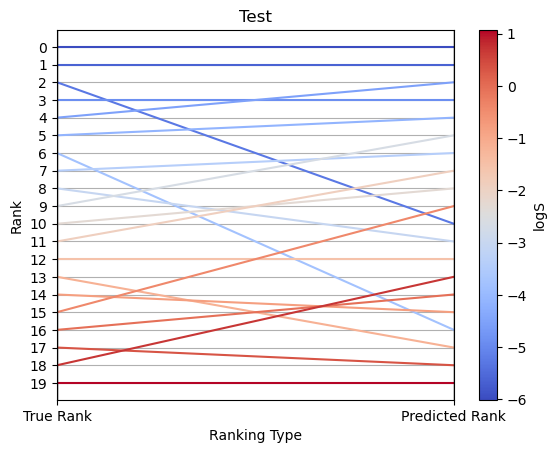

In [75]:
import matplotlib.pyplot as plt

df_plot = pd.DataFrame({
    'True Rank': true_ranks_test,
    'Predicted Rank': pred_ranks_test,
    "logS": y_test
})
n_samples = len(df_plot)
df_plot = df_plot.sort_values('True Rank')

fig = plt.figure()
ax = fig.add_subplot(111)
pl = pd.plotting.parallel_coordinates(df_plot, 'logS', colormap=plt.cm.coolwarm, ax=ax)

norm = plt.Normalize(df_plot['logS'].min(), df_plot['logS'].max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('logS')

ax.set_title("Test")
ax.set_xlabel('Ranking Type')
ax.set_ylabel('Rank')
ax.set_yticks([i for i in range(n_samples)])
ax.invert_yaxis()
ax.get_legend().remove()

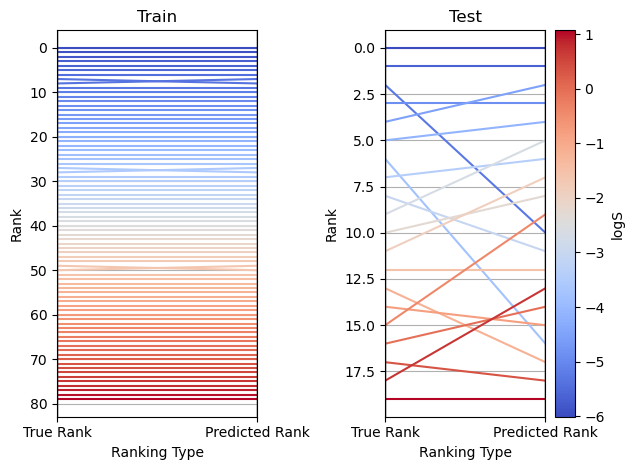

In [76]:
import matplotlib.pyplot as plt

plot_items = {
    "train":{
        'True Rank': true_ranks_train,
        'Predicted Rank': pred_ranks_train,
        "logS": y_train
    },
    "test":{
        'True Rank': true_ranks_test,
        'Predicted Rank': pred_ranks_test,
        "logS": y_test
    }
}

fig = plt.figure()

for i, (key, item) in enumerate(plot_items.items()):
    ax = fig.add_subplot(1, 2, i+1)
    df_plot = pd.DataFrame(item)
    n_samples = len(df_plot)
    df_plot = df_plot.sort_values('True Rank')

    pl = pd.plotting.parallel_coordinates(df_plot, 'logS', colormap=plt.cm.coolwarm, ax=ax)

    ax.set_title(f"{key.capitalize()}")

    ax.set_xlabel('Ranking Type')
    ax.set_ylabel('Rank')
    ax.invert_yaxis()
    ax.get_legend().remove()

    if i == 1:
        norm = plt.Normalize(df_plot['logS'].min(), df_plot['logS'].max())
        sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('logS')
    
fig.tight_layout()

In [77]:
from scipy.stats import kendalltau, spearmanr
from sklearn.metrics import ndcg_score


def evaluate_ranking_metrics(true_ranks, predicted_ranks):
    metrics = {}
    
    # 1. Spearman's Rank Correlation Coefficient
    spearman_corr, _ = spearmanr(true_ranks, predicted_ranks)
    metrics['spearman_correlation'] = spearman_corr
    
    # 2. Kendall's Tau
    kendall_tau, _ = kendalltau(true_ranks, predicted_ranks)
    metrics['kendall_tau'] = kendall_tau
    
    # 3. Mean Reciprocal Rank (MRR)
    def mrr(true_ranks, predicted_ranks):
        sorted_indices = np.argsort(predicted_ranks)
        true_ranks_sorted = true_ranks[sorted_indices]
        rr = 1.0 / (np.argwhere(true_ranks_sorted == 0)[0][0] + 1)
        return rr
    
    metrics['mrr'] = mrr(true_ranks, predicted_ranks)
    
    # 4. Normalized Discounted Cumulative Gain (NDCG)
    # Note: sklearn's ndcg_score expects relevance scores, not ranks
    relevance_scores = len(true_ranks) - true_ranks  # Convert ranks to relevance scores
    metrics['ndcg'] = ndcg_score([relevance_scores], [predicted_ranks])
    
    # 5. Precision at k
    def precision_at_k(true_ranks, predicted_ranks, k):
        top_k_predicted = np.argsort(predicted_ranks)[:k]
        top_k_true = np.argsort(true_ranks)[:k]
        return len(set(top_k_predicted) & set(top_k_true)) / k
    
    metrics['precision_at_5'] = precision_at_k(true_ranks, predicted_ranks, 5)
    metrics['precision_at_10'] = precision_at_k(true_ranks, predicted_ranks, 10)
    
    return metrics

In [78]:
metrics = evaluate_ranking_metrics(true_ranks_train, pred_ranks_train)
metrics

{'spearman_correlation': 0.9999296765119551,
 'kendall_tau': 0.9981012658227848,
 'mrr': 1.0,
 'ndcg': 0.6819357957638692,
 'precision_at_5': 1.0,
 'precision_at_10': 1.0}

In [79]:
metrics = evaluate_ranking_metrics(true_ranks_test, pred_ranks_test)
metrics

{'spearman_correlation': 0.77593984962406,
 'kendall_tau': 0.631578947368421,
 'mrr': 1.0,
 'ndcg': 0.6827947014858818,
 'precision_at_5': 0.8,
 'precision_at_10': 0.7}